# 3.1. Геометрические характеристики бинарных изображений

### Задание 3.1.
Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.

In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

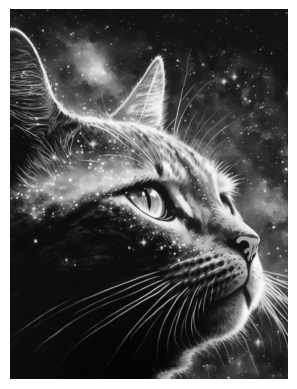

In [69]:
img = cv2.imread('img/cat_art.jpg',0)
imag = cv2.imread('img/cat_art.jpg',0)
# вывод изображения
plt.imshow(img, 'gray')
plt.axis("off");

Получим контур и топологическую структуру изображения:
Контур (первое возвращаемое значение) – это список, в котором хранятся все контуры изображения. Каждый контур представляет собой массив numpy, содержащий координаты точек границы объекта (x, y)
Топологической структурой (иерархия) – называется связь одного контура с другим, при помощи иерархии можно определить является ли контур дочерним или родительским по отношению к другому, если это необходимо


In [70]:
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

Выделим один внешний контур

In [71]:
cnt = contours[0]

Найдём площадь ограниченную контуром

In [72]:
ar = cv2.contourArea(cnt)
print(ar)

306081.0


Теперь получим длину контурного периметра

In [73]:
prm = cv2.arcLength(cnt,True)
print(prm)

2236.0


Моменты представляют собой среднее значение интенсивности пикселей изображения.
Найдём их:

In [74]:
M = cv2.moments(cnt)
print(M)

{'m00': 306081.0, 'm10': 73306399.5, 'm01': 97792879.5, 'm20': 23409176907.0, 'm11': 23421394640.25, 'm02': 41659766667.0, 'm30': 8409746803839.75, 'm21': 7479232021786.5, 'm12': 9977514116746.5, 'm03': 19965443175159.75, 'mu20': 5852294226.75, 'mu11': 0.0, 'mu02': 10414941666.75, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.062467396974439225, 'nu11': 0.0, 'nu02': 0.11116910229645094, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


Получим высоту и ширину

In [75]:
x,y,w,h = cv2.boundingRect(cnt)
print(x,y,w,h)

0 0 480 640


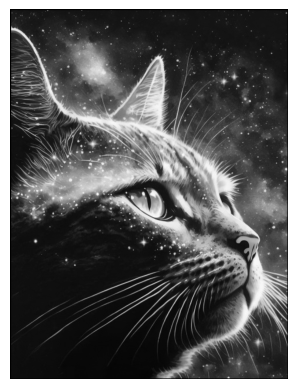

In [76]:
imag = cv2.rectangle(imag,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(imag, 'gray')
plt.axis('off');

Найдём отношение ширины к высоте

In [77]:
asprat = float(w) / h
print(asprat)

0.75


Найдём отношение площади контура к площади ограничивающего прямоугольника

In [78]:
rectar = w * h
extent = float(ar)/rectar
print(extent)

0.996357421875


Найдём эквивалентный диаметр:

In [79]:
eqdiam = np.sqrt(4*ar/np.pi)
print(eqdiam)

624.2711214625288


# Задание 3.2 Характерные параметры бинарных изображений

### Задание 3.2.
Используя изображение маски определить крайние точки, минимальное и максимальное значения и их координаты для бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью.

In [80]:
img = cv2. imread('img/cat_art.jpg',0)
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

Получим маску изображения

In [81]:
mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))

Максимальное и минимальное значения и их координаты

In [82]:
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

Найдём крайние точки изображения

In [83]:
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

Средняя интенсивность

In [84]:
meanv = cv2.mean(img,mask = mask)

Ориентация – это угол, под которым направлено выделенное направление изображения. Найдём её

In [85]:
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)

In [86]:
print(pixpoin)
print(minv, maxv, minl, maxl)
print(leftmost, rightmost, topmost, bottommost)
print(meanv)
print(ang)
cv2.waitKey(0);

[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [639 477]
 [639 478]
 [639 479]]
2.0 246.0 (283, 513) (54, 313)
(0, 0) (479, 0) (0, 0) (479, 639)
(66.70671549479167, 0.0, 0.0, 0.0)
0.0
